Question 2: Which neighborhoods are more expensive to rent an airbnb and which are more on the cheaper side?

Read in the necessary libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To achive an uniform appearance of all plots the 'darkgrid' template of seaborn is set as main visualization style
sns.set(style="darkgrid")

Read in the cleaned data:

In [17]:
df_raw_cleaned = pd.read_csv('airbnb_data_berlin_cleaned.csv')

One key metric regarding the price of a listing is probably the size of the apartment. The available data allows us to somehow make things comparable if we calculate the price per bed instead. Therefore we aggregate the mean bedcount and the mean price of all listings in each neighborhood.

In [18]:
df_analyze_q2 = df_raw_cleaned.copy()

In [19]:
df_analyze_q2 = df_raw_cleaned.groupby(['neighbourhood_group_cleansed'], as_index=False).aggregate(beds=('beds','mean'), price=('price','mean')).sort_values(by='price',ascending=False)
df_analyze_q2.head()

,neighbourhood_group_cleansed,beds,price
0,111,1125.000000,1125.000000
5,Mitte,1.798034,139.082628
9,Spandau,2.261905,124.938462
4,Marzahn - Hellersdorf,2.363636,111.245455
11,Tempelhof - Schöneberg,1.820171,102.213884


Also calculating the average price per bed:

In [20]:
df_analyze_q2['price/bed'] = df_analyze_q2.price / df_analyze_q2.beds
df_analyze_q2.head()

,neighbourhood_group_cleansed,beds,price,price/bed
0,111,1125.000000,1125.000000,1.000000
5,Mitte,1.798034,139.082628,77.352615
9,Spandau,2.261905,124.938462,55.235951
4,Marzahn - Hellersdorf,2.363636,111.245455,47.065385
11,Tempelhof - Schöneberg,1.820171,102.213884,56.156190


And also visualize it.

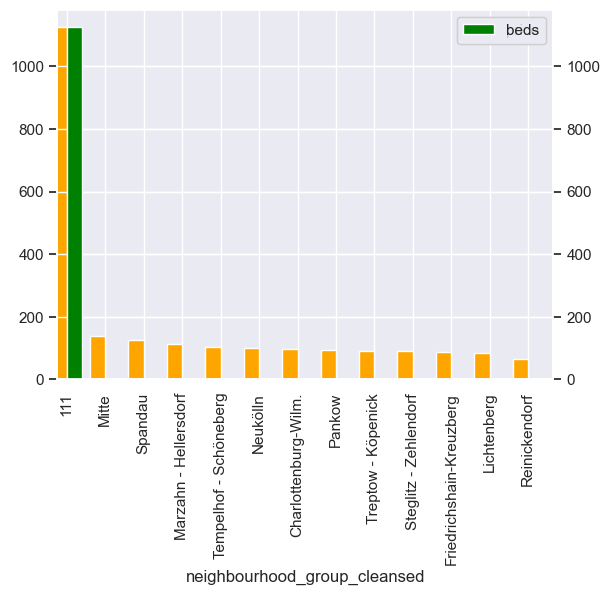

In [21]:
fig = plt.figure()

ax = fig.add_subplot()
ax2 = ax.twinx()

df_analyze_q2.plot(x='neighbourhood_group_cleansed', y='price', kind='bar', ax=ax, width=0.4, position=1, color='orange')
df_analyze_q2.plot(x='neighbourhood_group_cleansed', y='beds', kind='bar', ax=ax2, width=0.4, position=0, color='green')

plt.show()

Visualize the average price per bed for all neighborhoods in Berlin:

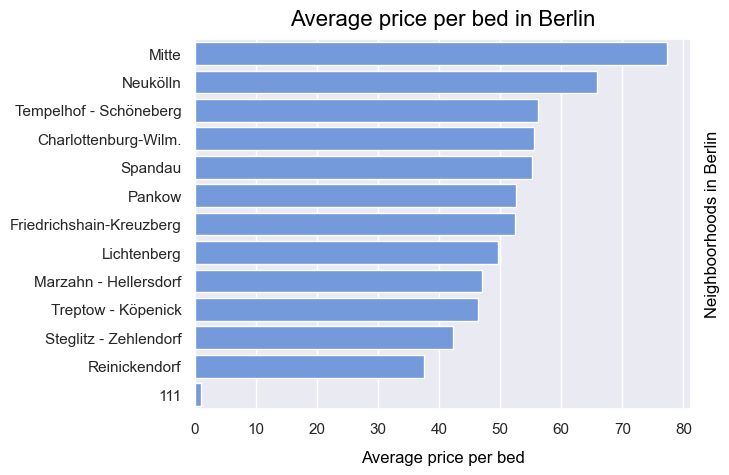

In [22]:
fig = sns.barplot(data=df_analyze_q2.sort_values(by=['price/bed'], ascending=False), y='neighbourhood_group_cleansed', x='price/bed', color='cornflowerblue')
fig.set_title('Average price per bed in Berlin', pad=10, fontsize=16, color='black');
fig.set_xlabel('Average price per bed', fontsize=12, color='black', labelpad=10);
fig.set_ylabel('Neighboorhoods in Berlin', fontsize=12, color='black', labelpad=10);
fig.yaxis.set_label_position('right');